In [86]:
import matplotlib.pyplot as plt

In [87]:
def create_plot(real, resp):
    assert(len(real) == len(resp))
    time = list(range(len(resp)))
    f = plt.figure()
    f.set_figwidth(40)
    f.set_figheight(15)

    plt.plot(time, real,'g-o', label = "real")
    plt.plot(time, resp,'r-o', label = "observation")
    plt.xlabel('Entry number')
    plt.ylabel('Observed similarity')
    plt.legend()
    
    plt.show()

In [88]:
def simple_plot(x, reysp):
    f = plt.figure()
    f.set_figwidth(40)
    f.set_figheight(15)

    plt.plot(x, y,'g-o', label = "real")
    plt.xlabel('Itteration')
    plt.ylabel('Observed difference')
    plt.legend()
    
    plt.show()

In [93]:
from dataset.loaddataset import read_csv_file_parsed, create_one_index_for_sts, read_tsv_file_parsed, data_corpus_to_train
parsed_data = create_one_index_for_sts(
    read_tsv_file_parsed("./dataset/sts_nws.tsv")
)

In [94]:
# ===== Count Similarity =====
from comparisionEngine.cosine_similarity.word_count_sim import WordCountSim

compEngine = WordCountSim()
calculated_values = []
prediction_measure = []
size = min(50, len(parsed_data))
for data in parsed_data[:size]:
    comp_val = compEngine.wordSim(data["sentence1"], data["sentence2"])
    prediction_measure.append(comp_val)
    calculated_values.append((comp_val - data["score"]))
    print(
        "abs: {:.2f},calculation: {:.2f}, expected: {:.2f} dif: {:.2f},".format(
            abs(comp_val - data["score"]), comp_val, data["score"], (comp_val - data["score"])
        )
    )
print("avg diff : {}".format(sum(calculated_values) / size))

abs: 0.20,calculation: 0.80, expected: 0.60 dif: 0.20,
abs: 0.21,calculation: 0.29, expected: 0.08 dif: 0.21,
abs: 0.03,calculation: 0.79, expected: 0.76 dif: 0.03,
abs: 0.12,calculation: 0.76, expected: 0.64 dif: 0.12,
abs: 0.04,calculation: 0.88, expected: 0.92 dif: -0.04,
abs: 0.21,calculation: 0.59, expected: 0.80 dif: -0.21,
abs: 0.37,calculation: 0.23, expected: 0.60 dif: -0.37,
abs: 0.63,calculation: 0.63, expected: 0.00 dif: 0.63,
abs: 0.11,calculation: 0.67, expected: 0.56 dif: 0.11,
abs: 0.19,calculation: 0.55, expected: 0.36 dif: 0.19,
abs: 0.07,calculation: 0.77, expected: 0.84 dif: -0.07,
abs: 0.14,calculation: 0.86, expected: 1.00 dif: -0.14,
abs: 0.33,calculation: 0.59, expected: 0.92 dif: -0.33,
abs: 0.03,calculation: 0.55, expected: 0.52 dif: 0.03,
abs: 0.33,calculation: 0.43, expected: 0.76 dif: -0.33,
abs: 0.06,calculation: 0.62, expected: 0.68 dif: -0.06,
abs: 0.13,calculation: 0.87, expected: 1.00 dif: -0.13,
abs: 0.13,calculation: 0.71, expected: 0.84 dif: -0.13,


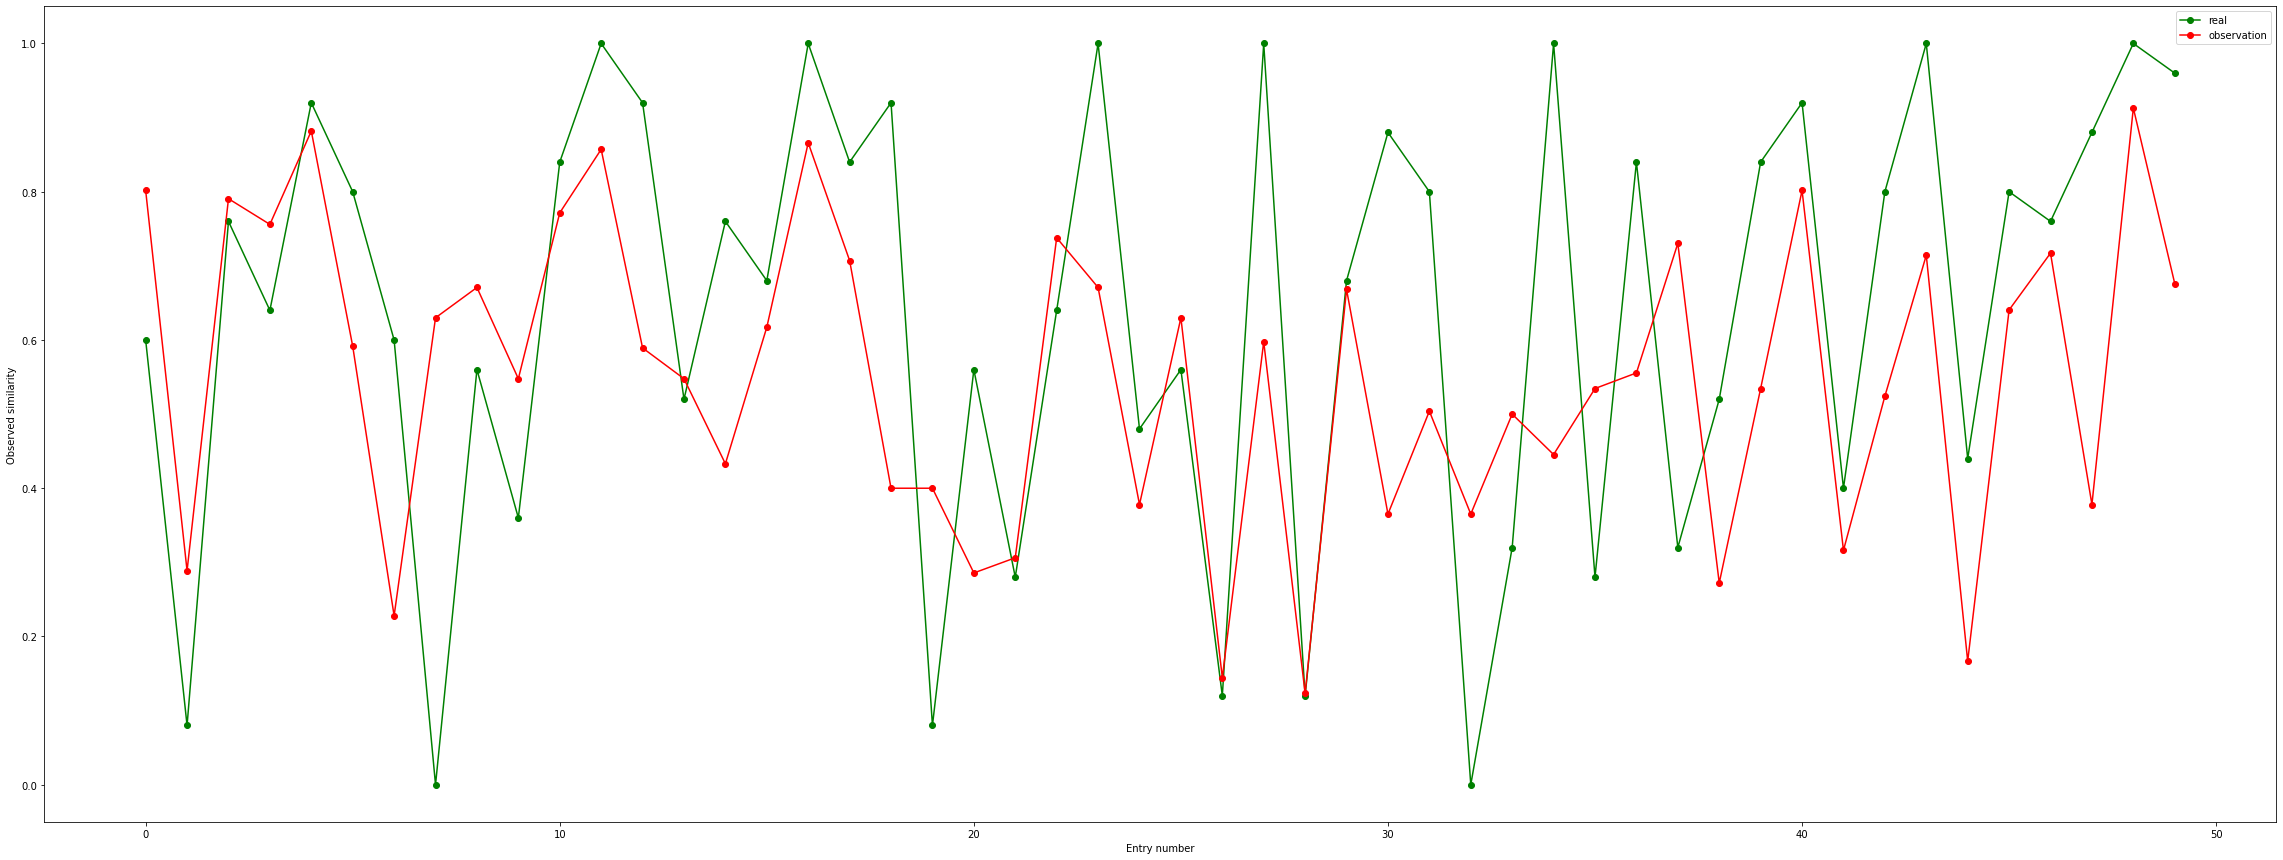

In [95]:
create_plot( [data['score'] for data in parsed_data[:size]] ,prediction_measure )

In [37]:
# ======== Tf-Idf Sim ===========
from comparisionEngine.cosine_similarity.tfidf_sim import TfidfSim
compEngine = TfidfSim()
calculated_values = []
prediction_measure = []

size = 50
for data in parsed_data[:size]:
    comp_metric = compEngine.rank_documents(data["sentence1"], [data["sentence2"]])[0]
    prediction_measure.append(comp_metric)
    calculated_values.append((comp_metric - data["score"]))
    print(
        "abs: {:.2f},calculation: {:.2f}, expected: {:.2f} dif: {:.2f},".format(
            abs(comp_metric - data["score"]), comp_metric, data["score"], (comp_metric - data["score"])
        )
    )
print("avg diff : {}".format(sum(calculated_values) / size))

abs: 0.12,calculation: 0.72, expected: 0.60 dif: 0.12,
abs: 0.11,calculation: 0.19, expected: 0.08 dif: 0.11,
abs: 0.01,calculation: 0.75, expected: 0.76 dif: -0.01,
abs: 0.12,calculation: 0.52, expected: 0.64 dif: -0.12,
abs: 0.05,calculation: 0.87, expected: 0.92 dif: -0.05,
abs: 0.46,calculation: 0.34, expected: 0.80 dif: -0.46,
abs: 0.44,calculation: 0.16, expected: 0.60 dif: -0.44,
abs: 0.45,calculation: 0.45, expected: 0.00 dif: 0.45,
abs: 0.05,calculation: 0.51, expected: 0.56 dif: -0.05,
abs: 0.07,calculation: 0.29, expected: 0.36 dif: -0.07,
abs: 0.50,calculation: 0.34, expected: 0.84 dif: -0.50,
abs: 0.28,calculation: 0.72, expected: 1.00 dif: -0.28,
abs: 0.35,calculation: 0.57, expected: 0.92 dif: -0.35,
abs: 0.14,calculation: 0.38, expected: 0.52 dif: -0.14,
abs: 0.55,calculation: 0.21, expected: 0.76 dif: -0.55,
abs: 0.10,calculation: 0.58, expected: 0.68 dif: -0.10,
abs: 0.66,calculation: 0.34, expected: 1.00 dif: -0.66,
abs: 0.39,calculation: 0.45, expected: 0.84 dif: -0

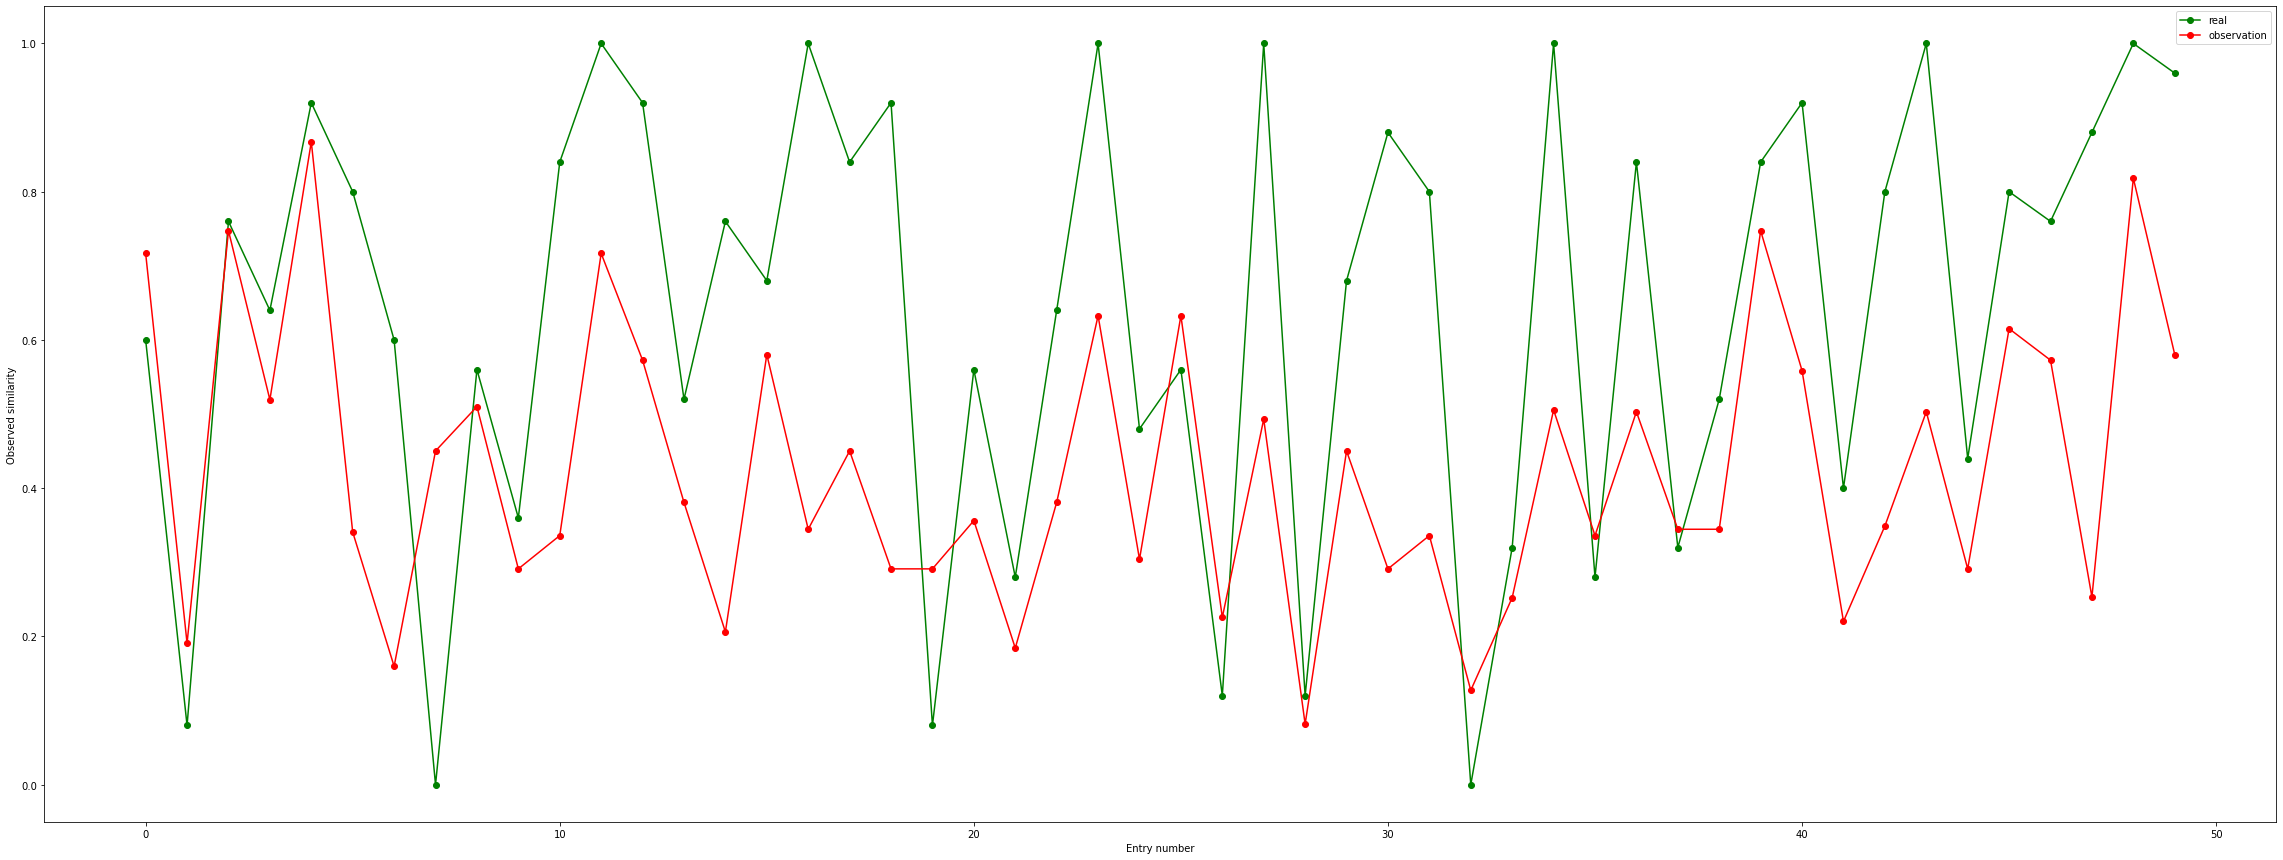

In [38]:
create_plot(
    [data['score'] for data in parsed_data[:size]],
    prediction_measure
)

### Trained Tf-Idf

In [112]:
file_corpus = read_csv_file_parsed("./dataset/sts_sport.csv")

In [113]:
corpus = []
for f in file_corpus:
    corpus.append(f[0])

In [121]:
# ======== Tf-Idf Sim ===========
compEngine = TfidfSim()
calculated_values = []
prediction_measure = []

size = 1
for data in parsed_data[:size]:
    temp_corpus = ["trees grow apple", "tree give us apples"] + corpus
    comp_metric = compEngine.rank_documents(
        "apples are from tree", temp_corpus
    )[1]
    prediction_measure.append(comp_metric)
    calculated_values.append((comp_metric - data["score"]))
    print(
        "abs: {:.2f},calculation: {:.2f}, expected: {:.2f} dif: {:.2f},".format(
            abs(comp_metric - data["score"]), comp_metric, data["score"], (comp_metric - data["score"])
        )
    )
print("avg diff : {}".format(sum(calculated_values) / size))

abs: 0.10,calculation: 0.50, expected: 0.60 dif: -0.10,
avg diff : -0.10476898688841291


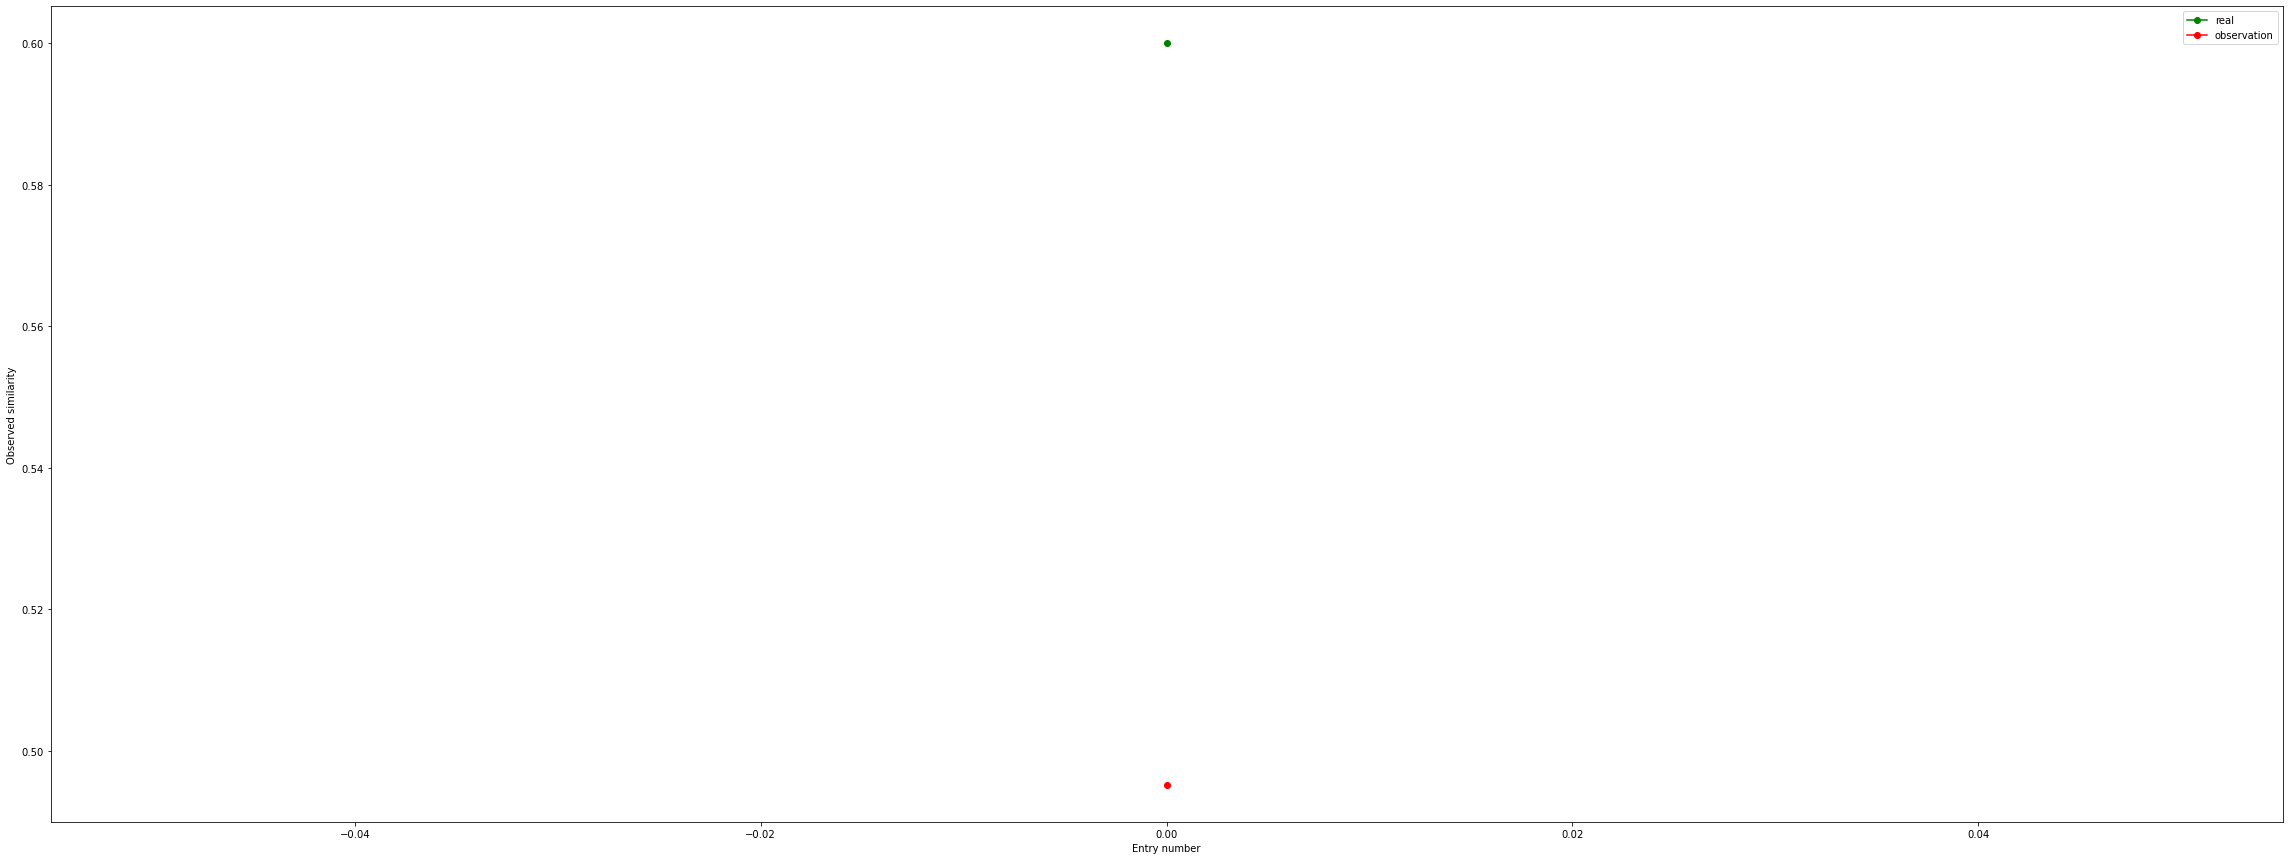

In [115]:
create_plot(
    [data['score'] for data in parsed_data[:size]],
    prediction_measure
)

In [ ]:
# ======= word vec sim ==========
from comparisionEngine.cosine_similarity.word_vec_sim import DocSim
compEngine = DocSim(verbose=True)

In [ ]:
count = 0
calculated_values = []
prediction_measure = []

size = 50
for data in parsed_data[:size]:
    try:
        similarities_array = compEngine.similarity_query(data["sentence1"], [data["sentence2"]])
        if type(similarities_array) == list:
            similarities = similarities_array[0]
        elif type(similarities_array) == float:
            similarities = similarities_array
        elif type(similarities_array) == int:
            similarities = similarities_array
        else:
            similarities = 0.0
        prediction_measure.append(similarities)
        calculated_values.append((similarities - data["score"]))
        # if abs(similarities - data["score"]) <= 0.2:
        print("{0:03}>>>".format(count), end=" ")
        count += 1
        print(
            "abs: {:.2f},calculation: {:.2f}, expected: {:.2f} dif: {:.2f}".format(
                abs(similarities - data["score"]),
                similarities,
                data["score"],
                (similarities - data["score"])
            )
        )
    except Exception as ex:
        print("======Exception Found======")
        print("...",similarities_array)
        print(ex)
        print(data)
        print("======Exception Found======")
print("avg diff : {}".format(sum(calculated_values) / size))

In [ ]:
create_plot(
    [data['score'] for data in parsed_data[:size]],
    prediction_measure
)

In [ ]:
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'this is animal',
    'we is animal',
    'animal are we'
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X.shape)


In [ ]:
X.toarray()

In [ ]:
X[0:1].toarray()

In [ ]:
linear_kernel(X[0:1], X)

In [ ]:
linear_kernel(X[0:1], X).flatten()

In [ ]:
import numpy as np

In [ ]:
np.dot(X[0:1], X.T).toarray().flatten()


## Observation

1. To do tf-idf:
    train the model on same data class ( a small topic let say to create a co relation )
    then find the vectorized form for the first 2 vectors and proceed over it
    
    ```
        from sklearn.feature_extraction.text import TfidfVectorizer
        corpus = [
            'sent1',
            'sent2',
            'this is animal',
            'we is animal',
            'animal are we'
        ]
        vectorizer = TfidfVectorizer()
        X = vectorizer.fit_transform(corpus)
        print(vectorizer.get_feature_names())
        linear_kernel(X[0:1], X).flatten()       
    ```


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [79]:
corpus = data_corpus_to_train(
    read_tsv_file_parsed("./dataset/sts_answer.csv")
)

In [80]:
corpus = ["China to resume US investment talks", "China and bratain hold nice talks"] + corpus

In [81]:
print(corpus[:19])

['China to resume US investment talks', 'China and bratain hold nice talks', 'we have apple', 'we have fruit', 'we have car', 'we have fruit', 'hollywood will be required occasionally to cast english actors as good guys.', 'hollywood will also be required to cast english actors to play english characters.', 'so sueing companies like boeing because they want to build in a state his "friends" don\'t control is not hurting job growth?', '| decisions based on evidence so sueing companies like boeing because they want to build in a state his "friends" don\'t control is not hurting job growth?', 'insignificant to you maybe.', "insignificant 20 bucks a week isn't?", 'sorry, agw has been proven.', 'agw has not been proven.', 'and this unemployment bill?', 'about the unemployment bill?', 'yeah, we love the troops the way michael vick loves dogs.', "maher: america loves its troops 'the way michael vick loves dogs' | newsbusters.org", "don't cook for him - he's a grown up."]


In [82]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(X.shape)

(756, 2388)


In [83]:
cp = linear_kernel(X[0:1], X).flatten()

In [84]:
[item.item() for item in cp[:5]]

[0.9999999999999999, 0.3704573845231356, 0.0, 0.0, 0.0]

In [85]:
cp[:5]

array([1.        , 0.37045738, 0.        , 0.        , 0.        ])

In [24]:
2.3/5.0

0.45999999999999996